# 기본 설정

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 변수 관계

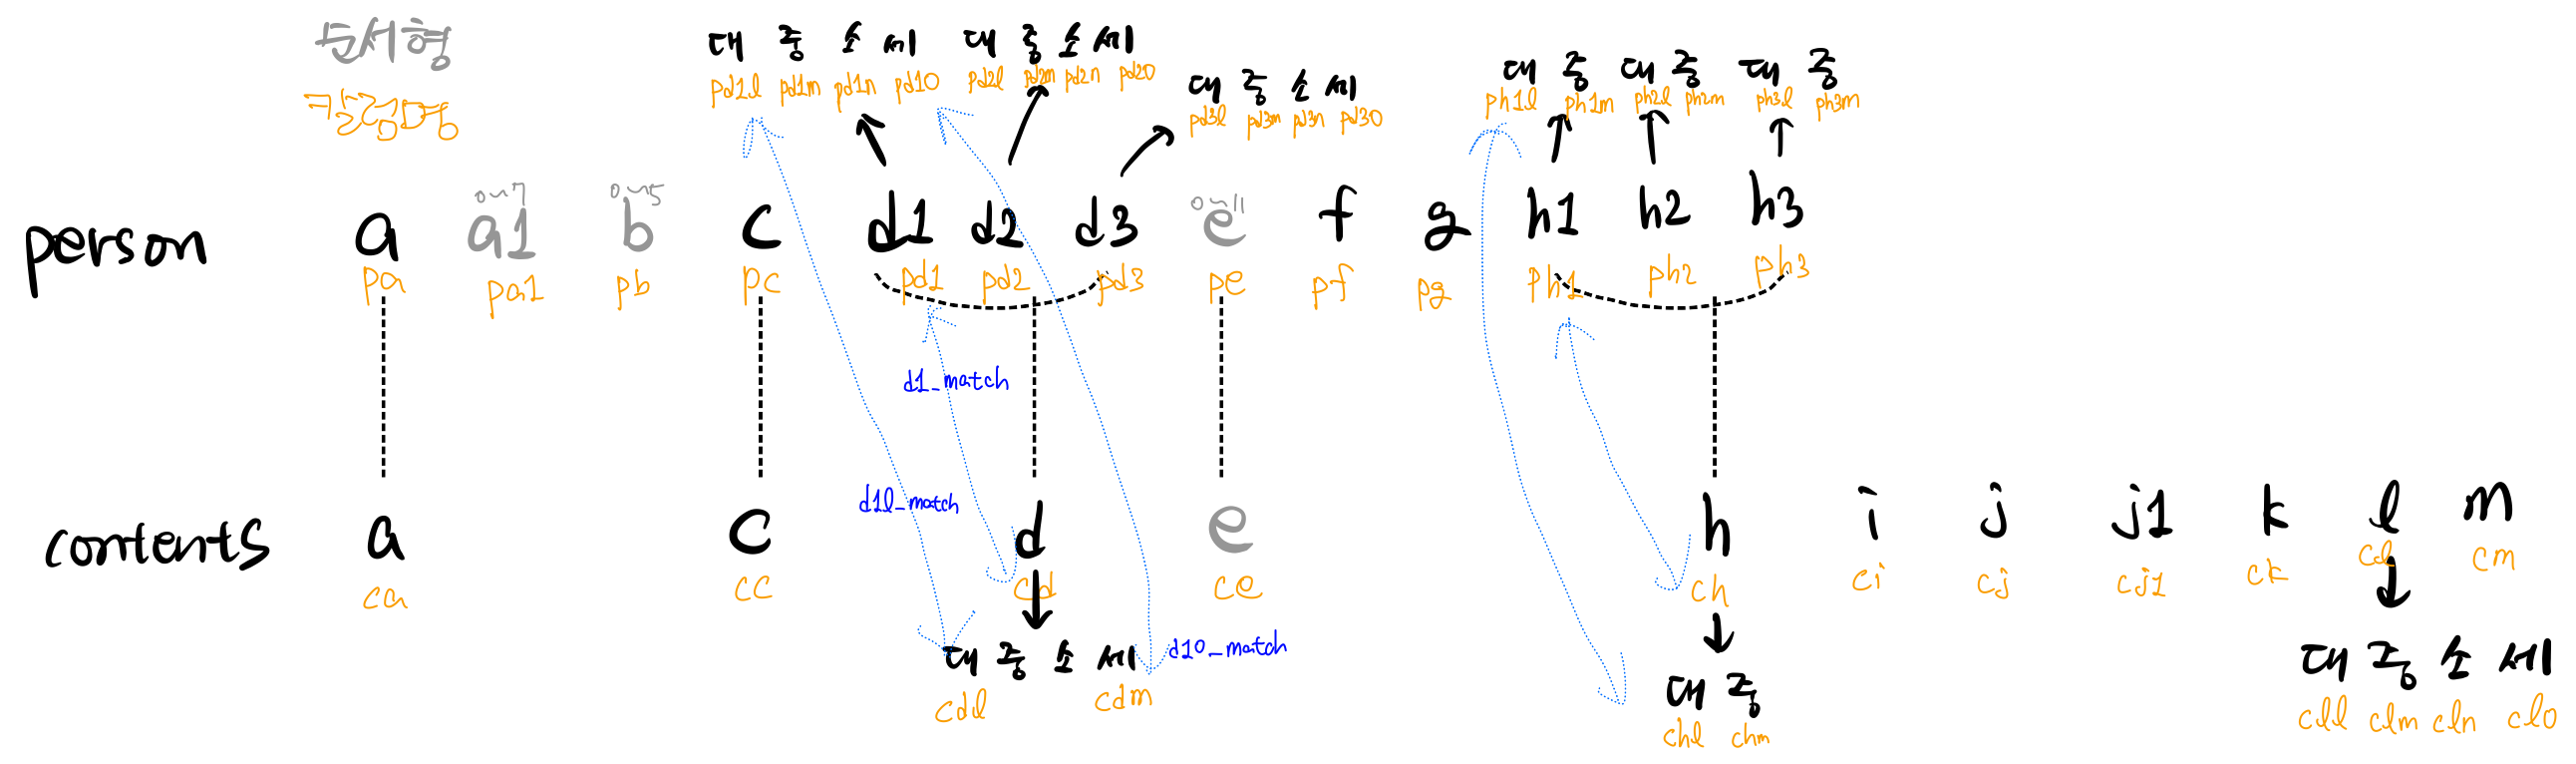

original data columns : Index(['id', 'dlmatch', 'dmmatch', 'dsmatch', 'hlmatch', 'hmmatch', 'hsmatch',
       'pa', 'pa1', 'pb', 'pc', 'pd1', 'pd2', 'pd3', 'pe', 'pf', 'pg', 'ph1',
       'ph2', 'ph3', 'ci', 'ca', 'cj1', 'cj', 'cc', 'ck', 'cl', 'cd', 'cm',
       'ce', 'ch', 'person_rn', 'contents_rn', 'contents_open_dt', 'target'],
      dtype='object')
pa           int64
pa1          int64
pb           int64
pc           int64
pd1          int64
             ...  
h2l_match     bool
h2m_match     bool
h3_match      bool
h3l_match     bool
h3m_match     bool
Length: 83, dtype: object


,pa,pa1,pb,pc,pd1,pd2,pd3,pe,pf,pg,ph1,ph2,ph3,ci,ca,cj1,cj,cc,ck,cl,cd,cm,ce,ch,person_rn,contents_rn,contents_open_dt,target,pd1l,pd1m,pd1n,pd1o,pd2l,pd2m,pd2n,pd2o,pd3l,pd3m,pd3n,pd3o,...,ph3l,ph3m,cdl,cdm,cdn,cdo,chl,chm,cll,clm,cln,clo,a_match,c_match,d1_match,d1l_match,d1m_match,d1n_match,d1o_match,d2_match,d2l_match,d2m_match,d2n_match,d2o_match,d3_match,d3l_match,d3m_match,d3n_match,d3o_match,e_match,h1_match,h1l_match,h1m_match,h2_match,h2l_match,h2m_match,h3_match,h3l_match,h3m_match,nof_match
0,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1,216,274,274,275,216,297,368,369,216,297,368,369,...,58,368,216,274,274,275,94,422,2016,1605,1606,1607,False,False,True,True,True,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,8
1,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0,1,56,109,114,1,56,152,175,1,56,152,175,...,94,399,216,274,274,275,94,417,2016,1605,1606,1607,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,True,False,False,True,False,6
2,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0,377,450,463,464,1,56,152,175,377,450,451,452,...,48,366,1,56,91,92,48,363,2016,1572,1595,1599,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,4
3,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0,618,690,703,703,618,690,703,703,618,690,703,703,...,1,315,216,274,274,275,71,381,2016,1605,1606,1607,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,2
4,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0,216,274,274,275,216,297,368,369,216,297,368,369,...,208,480,216,274,274,275,71,381,2016,1605,1606,1607,True,False,True,True,True,True,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,1,1,2,2,1192,935,1228,3,1,1,59,4,95,3,3,5,1,1,2,354,147,1,5,65,503156,285850,2020-03-13 12:55:52,1,926,1169,1180,1192,926,927,928,929,926,1227,1227,1227,...,94,398,1,56,123,145,58,373,2006,346,347,352,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,1
501947,1,6,2,1,118,113,110,4,1,1,105,142,95,3,3,10,2,1,2,163,120,1,4,142,676255,456996,2020-01-20 11:51:51,1,1,56,109,114,1,56,109,110,1,56,109,110,...,94,398,1,56,109,114,94,425,2006,99,138,155,False,True,False,True,True,True,True,False,True,True,True,False,False,True,True,True,False,True,False,True,False,True,True,True,False,True,False,17
501948,1,7,4,1,147,46,145,4,1,1,59,127,139,3,1,5,1,1,2,438,147,2,7,65,484528,293258,2020-08-05 17:27:24,1,1,56,123,145,1,2,43,46,1,56,123,145,...,94,422,1,56,123,145,58,373,2006,407,417,437,True,True,True,True,True,True,True,False,True,False,False,False,False,True,True,True,True,False,False,True,False,False,False,False,False,False,False,13
501949,1,1,2,1,46,147,145,4,1,1,251,49,258,3,2,5,1,1,2,660,147,3,4,259,456330,273797,2020-06-15 09:23:21,1,1,2,43,46,1,56,123,145,1,56,123,145,...,250,523,1,56,123,145,250,524,2006,651,652,659,False,True,False,True,False,False,False,True,True,True,True,True,False,True,True,True,True,True,False,True,False,Fal

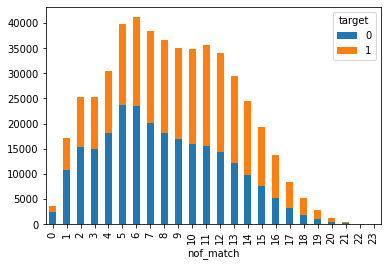

In [2]:
# Basic tool
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# Data split
from sklearn.model_selection import train_test_split 

os.chdir('/content/drive/MyDrive/015GithubRepos/Dacon_jobcare_recommendation')

dcode = pd.read_csv('Jobcare_data/속성_D_코드.csv', index_col=0)
dcode.rename(columns = {
    '속성 D 코드' : 'd',
    '속성 D 대분류코드' : 'dl',
    '속성 D 중분류코드' : 'dm',
    '속성 D 소분류코드' : 'dn',
    '속성 D 세분류코드' : 'do'
}, inplace=True)

hcode = pd.read_csv('Jobcare_data/속성_H_코드.csv', index_col=0)
hcode.rename(columns = {
    '속성 H 코드' : 'h',
    '속성 H 대분류코드' : 'hl',
    '속성 H 중분류코드' : 'hm'
}, inplace=True)

lcode = pd.read_csv('Jobcare_data/속성_L_코드.csv', index_col=0)
lcode.rename(columns = {
    '속성 L 코드' : 'ld',
    '속성 L 대분류코드' : 'll',
    '속성 L 중분류코드' : 'lm',
    '속성 L 소분류코드' : 'ln',
    '속성 L 세분류코드' : 'lo'
}, inplace=True)
dcode = dcode.T.to_dict()
hcode = hcode.T.to_dict()
lcode = lcode.T.to_dict()

tra = pd.read_csv('Jobcare_data/train.csv')


# 칼럼 이름 바꾸기
def df_rename(tra):
  tra.rename(columns = {
      'd_l_match_yn' : 'dlmatch',
      'd_m_match_yn' : 'dmmatch',
      'd_s_match_yn' : 'dsmatch',
      'h_l_match_yn' : 'hlmatch',
      'h_m_match_yn' : 'hmmatch',
      'h_s_match_yn' : 'hsmatch',
      'person_attribute_a' : 'pa',
      'person_attribute_a_1' : 'pa1',
      'person_attribute_b' : 'pb',
      'person_prefer_c' : 'pc',
      'person_prefer_d_1' : 'pd1',
      'person_prefer_d_2' : 'pd2',
      'person_prefer_d_3' : 'pd3',
      'person_prefer_e' : 'pe',
      'person_prefer_f' : 'pf',
      'person_prefer_g' : 'pg',
      'person_prefer_h_1' : 'ph1',
      'person_prefer_h_2' : 'ph2',
      'person_prefer_h_3' : 'ph3',
      
      'contents_attribute_i' : 'ci',
      'contents_attribute_a' : 'ca',
      'contents_attribute_j_1' : 'cj1',
      'contents_attribute_j' : 'cj',
      'contents_attribute_c' : 'cc',
      'contents_attribute_k' : 'ck',
      'contents_attribute_l' : 'cl',
      'contents_attribute_d' : 'cd',
      'contents_attribute_m' : 'cm',
      'contents_attribute_e' : 'ce',
      'contents_attribute_h' : 'ch'
      # 'person_rn' : 'dlmatch',
      # 'contents_rn' : 'dlmatch',
      # 'contents_open_dt' : 'dlmatch',
      }, inplace = True)
  return tra

def convert_time(tra):
  tra['contents_open_dt'] = tra['contents_open_dt'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
  return tra


tra = df_rename(tra)
tra = convert_time(tra)

tes = pd.read_csv('Jobcare_data/test.csv')
print(f'original data columns : {tra.columns}')

tes = df_rename(tes)
tes = convert_time(tes)

# 필요없는 칼럼 드랍.
tra = tra.drop(['id', 'dlmatch',	'dmmatch',	'dsmatch',	'hlmatch',	'hmmatch',	'hsmatch'], axis=1)
tes = tes.drop(['id', 'dlmatch',	'dmmatch',	'dsmatch',	'hlmatch',	'hmmatch',	'hsmatch'], axis=1)


# code 데이터 통합 #############################################
def code_combine(tra):
  

  # pd 
  tra['pd1l'] = tra['pd1'].apply(lambda x: dcode[x]['dl'])
  tra['pd1m'] = tra['pd1'].apply(lambda x: dcode[x]['dm'])
  tra['pd1n'] = tra['pd1'].apply(lambda x: dcode[x]['dn'])
  tra['pd1o'] = tra['pd1'].apply(lambda x: dcode[x]['do'])

  tra['pd2l'] = tra['pd2'].apply(lambda x: dcode[x]['dl'])
  tra['pd2m'] = tra['pd2'].apply(lambda x: dcode[x]['dm'])
  tra['pd2n'] = tra['pd2'].apply(lambda x: dcode[x]['dn'])
  tra['pd2o'] = tra['pd2'].apply(lambda x: dcode[x]['do'])

  tra['pd3l'] = tra['pd3'].apply(lambda x: dcode[x]['dl'])
  tra['pd3m'] = tra['pd3'].apply(lambda x: dcode[x]['dm'])
  tra['pd3n'] = tra['pd3'].apply(lambda x: dcode[x]['dn'])
  tra['pd3o'] = tra['pd3'].apply(lambda x: dcode[x]['do'])

  # ph
  tra['ph1l'] = tra['ph1'].apply(lambda x: hcode[x]['hl'])
  tra['ph1m'] = tra['ph1'].apply(lambda x: hcode[x]['hm'])

  tra['ph2l'] = tra['ph2'].apply(lambda x: hcode[x]['hl'])
  tra['ph2m'] = tra['ph2'].apply(lambda x: hcode[x]['hm'])

  tra['ph3l'] = tra['ph3'].apply(lambda x: hcode[x]['hl'])
  tra['ph3m'] = tra['ph3'].apply(lambda x: hcode[x]['hm'])

  # cd
  tra['cdl'] = tra['cd'].apply(lambda x: dcode[x]['dl'])
  tra['cdm'] = tra['cd'].apply(lambda x: dcode[x]['dm'])
  tra['cdn'] = tra['cd'].apply(lambda x: dcode[x]['dn'])
  tra['cdo'] = tra['cd'].apply(lambda x: dcode[x]['do'])

  # ch
  tra['chl'] = tra['ch'].apply(lambda x: hcode[x]['hl'])
  tra['chm'] = tra['ch'].apply(lambda x: hcode[x]['hm'])

  # cl
  tra['cll'] = tra['cl'].apply(lambda x: lcode[x]['ll'])
  tra['clm'] = tra['cl'].apply(lambda x: lcode[x]['lm'])
  tra['cln'] = tra['cl'].apply(lambda x: lcode[x]['ln'])
  tra['clo'] = tra['cl'].apply(lambda x: lcode[x]['lo'])

  # 매치 ##################################################

  # a
  tra['a_match'] = tra['pa'] == tra['ca']

  # c
  tra['c_match'] = tra['pc'] == tra['cc']

  # d
  tra['d1_match'] = tra['pd1'] == tra['cd']
  tra['d1l_match'] = tra['pd1l'] == tra['cdl']
  tra['d1m_match'] = tra['pd1m'] == tra['cdm']
  tra['d1n_match'] = tra['pd1n'] == tra['cdn']
  tra['d1o_match'] = tra['pd1o'] == tra['cdo']

  tra['d2_match'] = tra['pd2'] == tra['cd']
  tra['d2l_match'] = tra['pd2l'] == tra['cdl']
  tra['d2m_match'] = tra['pd2m'] == tra['cdm']
  tra['d2n_match'] = tra['pd2n'] == tra['cdn']
  tra['d2o_match'] = tra['pd2o'] == tra['cdo']

  tra['d3_match'] = tra['pd3'] == tra['cd']
  tra['d3l_match'] = tra['pd3l'] == tra['cdl']
  tra['d3m_match'] = tra['pd3m'] == tra['cdm']
  tra['d3n_match'] = tra['pd3n'] == tra['cdn']
  tra['d3o_match'] = tra['pd3o'] == tra['cdo']

  # e
  tra['e_match'] = tra['pe'] == tra['ce']

  # h
  tra['h1_match'] = tra['ph1'] == tra['ch']
  tra['h1l_match'] = tra['ph1l'] == tra['chl']
  tra['h1m_match'] = tra['ph1m'] == tra['chm']

  tra['h2_match'] = tra['ph2'] == tra['ch']
  tra['h2l_match'] = tra['ph2l'] == tra['chl']
  tra['h2m_match'] = tra['ph2m'] == tra['chm']

  tra['h3_match'] = tra['ph3'] == tra['ch']
  tra['h3l_match'] = tra['ph3l'] == tra['chl']
  tra['h3m_match'] = tra['ph3m'] == tra['chm']
  
  return tra

tra = code_combine(tra)
tes = code_combine(tes)
print(tra.dtypes)

# 카테고리컬로 바꾸기
cat_cols = [
            'pa', 'pc', 
            'pd1', 'pd1l', 'pd1m', 'pd1n', 'pd1o', 
            'pd2', 'pd2l', 'pd2m', 'pd2n', 'pd2o', 
            'pd3', 'pd3l', 'pd3m', 'pd3n', 'pd3o', 
            'pf', 'pg',
            'ph1', 'ph1l', 'ph1m',
            'ph2', 'ph2l', 'ph2m',
            'ph3', 'ph3l', 'ph3m',

            'ca', 'cc', 
            'cd', 'cdl', 'cdm', 'cdn', 'cdo',
            'ch', 'chl', 'chm',
            'ci', 'cj', 'cj1', 'ck',
            'cll', 'clm', 'cln', 'clo',
            'cm'
            ]

for ccol in cat_cols:
  tra[ccol] = tra[ccol].astype('category')
  tes[ccol] = tes[ccol].astype('category')


# nof_match
cols = [
               'a_match',	'c_match',
               'd1_match',	'd1l_match',	'd1m_match',	'd1n_match', 'd1o_match',
               'd2_match',	'd2l_match',	'd2m_match',	'd2n_match',	'd2o_match',
               'd3_match',	'd3l_match',	'd3m_match',	'd3n_match',	'd3o_match',
               'e_match',
               'h1_match',	'h1l_match',	'h1m_match',
               'h2_match',	'h2l_match',	'h2m_match',
               'h3_match',	'h3l_match',	'h3m_match'
        ]
def f(df):
  nof_match = sum([df[col] for col in cols])
  return nof_match

tra['nof_match'] = tra.apply(f, axis=1)
tes['nof_match'] = tes.apply(f, axis=1)

tra_g = tra.groupby(['nof_match', 'target']).count().iloc[:, 0]
tra_g.unstack().plot(kind='bar', stacked=True)

tra

### 추천이었다. 유저-아이템 행렬

In [ ]:
len(tra['person_rn'].unique())

300177

훈련셋 유저 약 30만명

In [ ]:
len(tra['contents_rn'].unique())

283359

훈련셋 아이템 약 28만개

In [ ]:
len(tes['person_rn'].unique())

34534

테스트셋 유저 약 3만 4천명

In [ ]:
len(tes['contents_rn'].unique())

31489

테스트셋 아이템 약 3만개



In [ ]:
tra.groupby(['target']).mean()['nof_match']

target
0    7.845169
1    9.259435
Name: nof_match, dtype: float64

타겟 1인 유저들의 nof_match가 더 높다.

In [ ]:
person_cols = ['pa', 'pa1', 'pb', 'pc', 'pd1l', 'pd1m', 'pd1n', 'pd1o', 'pd2l', 'pd2m', 'pd2n', 'pd2o', 'pd3l', 'pd3m', 'pd3n', 'pd3o', 'pe', 'pf', 'pg', 'ph1l', 'ph1m', 'ph2l', 'ph2m', 'ph3l', 'ph3m']
content_cols = ['ca', 'cc', 'cdl', 'cdm', 'ce', 'chl', 'chm', 'ci', 'cj', 'cj1', 'ck', 'cll', 'clm', 'cln', 'clo', 'cm']

In [ ]:
ui = tra[tra['person_rn'] == 618822][person_cols].iloc[0, :]
uj = tra[tra['person_rn'] == 571659][person_cols].iloc[0, :]
sum(ui == uj) / len(person_cols)

In [ ]:
con_i = tra[tra['contents_rn'] == 354805][content_cols].iloc[0, :]
con_j = tra[tra['contents_rn'] == 346213][content_cols].iloc[0, :]
sum(con_i == con_j) / len(content_cols)

In [ ]:
len(set(tes['person_rn'].unique()).intersection(set(tra['person_rn'].unique())))

8148

테스트셋 유저와 훈련셋 유저는 8100개가 겹친다.

In [ ]:
len(set(tes['contents_rn'].unique()).intersection(set(tra['contents_rn'].unique())))

3663

테스트셋 아이템과 훈련셋 아이템은 3600개가 겹친다.

In [ ]:
testpid = tes['person_rn'][0]
testpid

sim_d = {}
ui = tes[tes['person_rn'] == testid][person_cols].iloc[0, :]

for tra_u in tra['person_rn'].unique():
  uj = tra[tra['person_rn'] == tra_u][person_cols].iloc[0, :]
  sim = sum(ui == uj) / len(person_cols)
  sim_d[tra_u] = sim

In [ ]:
import pickle
with open('testpid393790_simd.pkl', 'wb') as q:
  pickle.dump(sim_d, q)

In [ ]:
testcid = tes['contents_rn'][0]
testcid

sim_d = {}
ci = tes[tes['contents_rn'] == testcid][content_cols].iloc[0, :]


for tra_c in tra['contents_rn'].unique():
  cj = tra[tra['contents_rn'] == tra_c][content_cols].iloc[0, :]
  sim = sum(ci == cj) / len(content_cols)
  sim_d[tra_c] = sim

In [ ]:
import pickle
with open('testcid236865_simd.pkl', 'wb') as q:
  pickle.dump(sim_d, q)

In [ ]:
import pickle

with open('testpid393790_simd.pkl', 'rb') as q:
  sim_d_pid = pickle.load(q)

with open('testcid236865_simd.pkl', 'rb') as q:
  sim_d_cid = pickle.load(q)

In [ ]:
sorted(sim_d_pid.items(), key=lambda x: x[1], reverse=True)[:1000]

In [ ]:
sorted(sim_d_cid.items(), key=lambda x: x[1], reverse=True)[:1000]

[(645004, 0.875),
 (410865, 0.875),
 (125861, 0.8125),
 (123473, 0.8125),
 (301416, 0.8125),
 (124474, 0.8125),
 (76638, 0.8125),
 (127938, 0.8125),
 (14854, 0.8125),
 (78175, 0.8125),
 (549264, 0.8125),
 (532377, 0.8125),
 (156304, 0.8125),
 (236537, 0.8125),
 (14459, 0.8125),
 (396862, 0.8125),
 (319229, 0.8125),
 (236723, 0.8125),
 (155371, 0.8125),
 (146969, 0.8125),
 (229643, 0.8125),
 (151825, 0.8125),
 (250342, 0.75),
 (322036, 0.75),
 (269594, 0.75),
 (264012, 0.75),
 (309353, 0.75),
 (124029, 0.75),
 (400417, 0.75),
 (79305, 0.75),
 (128716, 0.75),
 (262309, 0.75),
 (260394, 0.75),
 (268382, 0.75),
 (106397, 0.75),
 (730022, 0.75),
 (122804, 0.75),
 (411143, 0.75),
 (80488, 0.75),
 (171725, 0.75),
 (271210, 0.75),
 (84525, 0.75),
 (379193, 0.75),
 (186874, 0.75),
 (308557, 0.75),
 (188781, 0.75),
 (277609, 0.75),
 (217617, 0.75),
 (325114, 0.75),
 (314994, 0.75),
 (322789, 0.75),
 (170367, 0.75),
 (266546, 0.75),
 (189751, 0.75),
 (233892, 0.75),
 (81332, 0.75),
 (581821, 0.75

In [ ]:
tra[tra['contents_rn'] == 699849][content_cols]

,ca,cc,cdl,cdm,ce,chl,chm,ci,cj,cj1,ck,cll,clm,cln,clo,cm
59531,3,1,744,745,3,169,454,1,2,10,2,2010,1021,1116,1121,1


In [ ]:
tes[tes['contents_rn'] == 236865][content_cols]

,ca,cc,cdl,cdm,ce,chl,chm,ci,cj,cj1,ck,cll,clm,cln,clo,cm
0,3,1,744,824,5,250,528,1,2,10,2,2010,1021,1128,1146,1


In [ ]:
tes

,id,dlmatch,dmmatch,dsmatch,hlmatch,hmmatch,hsmatch,pa,pa1,pb,pc,pd1,pd2,pd3,pe,pf,pg,ph1,ph2,ph3,ci,ca,cj1,cj,cc,ck,cl,cd,cm,ce,ch,person_rn,contents_rn,contents_open_dt,pd1l,pd1m,pd1n,pd1o,pd2l,pd2m,...,ph3l,ph3m,cdl,cdm,cdn,cdo,chl,chm,cll,clm,cln,clo,a_match,c_match,d1_match,d1l_match,d1m_match,d1n_match,d1o_match,d2_match,d2l_match,d2m_match,d2n_match,d2o_match,d3_match,d3l_match,d3m_match,d3n_match,d3o_match,e_match,h1_match,h1l_match,h1m_match,h2_match,h2l_match,h2m_match,h3_match,h3l_match,h3m_match,nof_match
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18,744,824,853,854,744,824,...,48,359,744,824,831,836,250,528,2010,1021,1128,1146,False,True,False,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,8
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53,618,659,677,683,926,1053,...,48,359,216,274,274,276,250,528,2016,1605,1606,1610,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False,False,False,4
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41,482,482,509,514,744,745,...,169,452,482,482,490,490,169,453,2020,1810,1811,1812,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True,False,False,True,False,8
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55,1,56,109,114,1,56,...,169,452,1,56,123,145,169,453,2006,99,100,101,False,False,False,True,True,False,False,False,True,True,False,False,False,True,True,False,False,False,True,True,True,False,True,False,False,True,False,11
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34,926,1053,1078,1078,926,1053,...,3,316,926,1093,1094,1097,169,453,2009,954,980,984,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,True,True,False,False,False,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46399,46399,True,True,True,False,False,False,2,0,4,1,147,46,145,4,1,1,2,4,95,3,3,5,1,1,2,759,147,1,5,91,425040,726084,2020-12-17 01:06:26,1,56,123,145,1,2,...,94,398,1,56,123,145,85,396,2006,759,759,759,False,True,True,True,True,True,True,False,True,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,11
46400,46400,True,False,False,True,False,False,2,0,4,1,176,120,159,4,1,1,86,31,278,3,3,10,2,1,2,759,147,1,4,91,290061,156948,2020-12-29 21:57:25,1,56,152,175,1,56,...,277,542,1,56,123,145,85,396,2006,759,759,759,False,True,False,True,True,False,False,False,True,True,False,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,False,9
46401,46401,True,True,False,True,True,True,2,0,3,1,145,46,147,5,1,1,288,279,278,3,3,10,2,1,2,759,147,1,4,288,307951,175069,2020-12-10 19:09:09,1,56,123,145,1,2,...,277,542,1,56,123,145,277,547,2006,759,759,759,False,True,False,True,True,True,True,False,True,False,False,False,True,True,True,True,True,False,True,True,True,False,True,False,False,True,False,16
46402,46402,True,True,False,True,True,True,1,3,3,2,145,46,147,6,1,1,288,279,278,3,1,5,1,3,2,759,147,1,5,288,308354,174849,2020-12-07 14:04:34,1,56,123,145,1,2,...,277,542,1,56,123,145,277,547,2006,759,759

In [ ]:
topNusers = sorted(sim_d_pid.items(), key=lambda x: x[1], reverse=True)[:10]

In [ ]:
topNusers = [_[0] for _ in topNusers]

In [ ]:
topNusers

[386127,
 385817,
 388964,
 392041,
 391934,
 392930,
 444823,
 386829,
 389459,
 389320]

In [ ]:
topNitems = sorted(sim_d_cid.items(), key=lambda x: x[1], reverse=True)[:10]

In [ ]:
topNitems = [_[0] for _ in topNitems]

In [ ]:
topNitems

[645004, 410865, 125861, 123473, 301416, 124474, 76638, 127938, 14854, 78175]

In [ ]:
l = list()
cnt = 0
pred = 0
for uid in topNusers:
  print(f'393790 <-> {uid} : {sim_d_pid[uid]}')
  print(f'-------------------------------')
  dataset = tra[tra['person_rn'] == uid]
  for item in dataset['contents_rn']:
    row = dataset[(dataset['person_rn'] == uid) & (dataset['contents_rn'] == item)]
    target = row.iloc[0]['target']
    l.append((uid, item, target))

    print(f'236865 <-> {item} : {sim_d_cid[item]}\ttar : {target}')
    if target == 1:
      pred += sim_d_cid[item] * 5 * sim_d_pid[uid]
      print(f'{sim_d_cid[item]} * 5 * {sim_d_pid[uid]} = {sim_d_cid[item] * 5 * sim_d_pid[uid]}')
    else:
      pred += sim_d_cid[item] * 1 * sim_d_pid[uid]
      print(f'{sim_d_cid[item]} * 1 * {sim_d_pid[uid]} = {sim_d_cid[item] * 1 * sim_d_pid[uid]}')
    
    cnt += 1

  print(f'')

393790 <-> 386127 : 0.92
-------------------------------
236865 <-> 229874 : 0.6875	tar : 1
0.6875 * 5 * 0.92 = 3.1625

393790 <-> 385817 : 0.92
-------------------------------
236865 <-> 230183 : 0.375	tar : 0
0.375 * 1 * 0.92 = 0.34500000000000003

393790 <-> 388964 : 0.92
-------------------------------
236865 <-> 233048 : 0.6875	tar : 1
0.6875 * 5 * 0.92 = 3.1625

393790 <-> 392041 : 0.92
-------------------------------
236865 <-> 234974 : 0.3125	tar : 0
0.3125 * 1 * 0.92 = 0.28750000000000003

393790 <-> 391934 : 0.92
-------------------------------
236865 <-> 235276 : 0.6875	tar : 1
0.6875 * 5 * 0.92 = 3.1625

393790 <-> 392930 : 0.92
-------------------------------
236865 <-> 235940 : 0.6875	tar : 1
0.6875 * 5 * 0.92 = 3.1625
236865 <-> 235832 : 0.5625	tar : 1
0.5625 * 5 * 0.92 = 2.5875

393790 <-> 444823 : 0.88
-------------------------------
236865 <-> 393583 : 0.3125	tar : 0
0.3125 * 1 * 0.88 = 0.275

393790 <-> 386829 : 0.88
-------------------------------
236865 <-> 230947 

In [ ]:
pred / cnt

1.6184615384615384

In [ ]:
# 유사도 행렬 만들기
import numpy as np
pid = {}
cnt = 1

for p in tra['person_rn'].unique():
  pid[p] = cnt
  cnt += 1

In [ ]:
cnt

300178

In [ ]:
for i in tes['person_rn'].unique():
  if i not in pid:
    pid[i] = cnt
    cnt += 1

In [ ]:
cnt

326564

In [ ]:
for u in range(10):
  user_n = tra['person_rn'][u]
  dataof_user = tra[tra['person_rn'] == user_n]
  one = sum(dataof_user['target'] == 1)
  zero =  sum(dataof_user['target'] == 0)
  print(f'userid : {user_n:>10} \t data 개수 : {dataof_user.shape[0]:>3} \t 1개수 : {one} \t 0개수 : {zero}')

userid :     618822 	 data 개수 :   1 	 1개수 : 1 	 0개수 : 0
userid :     571659 	 data 개수 :   2 	 1개수 : 0 	 0개수 : 2
userid :     399816 	 data 개수 :   1 	 1개수 : 0 	 0개수 : 1
userid :     827967 	 data 개수 :   3 	 1개수 : 1 	 0개수 : 2
userid :     831614 	 data 개수 :   1 	 1개수 : 0 	 0개수 : 1
userid :     836994 	 data 개수 :   4 	 1개수 : 2 	 0개수 : 2
userid :     380340 	 data 개수 :   4 	 1개수 : 0 	 0개수 : 4
userid :     763441 	 data 개수 :   1 	 1개수 : 1 	 0개수 : 0
userid :     595150 	 data 개수 :   1 	 1개수 : 0 	 0개수 : 1
userid :     665636 	 data 개수 :   2 	 1개수 : 0 	 0개수 : 2


### 두 변수 관계들 보자

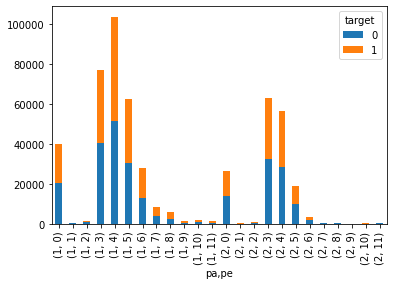

In [ ]:
cols = ['pe']
for col in cols:
  tra_g = tra.groupby(['pa', col, 'target']).count()['id']
  tra_g.unstack().plot(kind='bar', stacked=True)

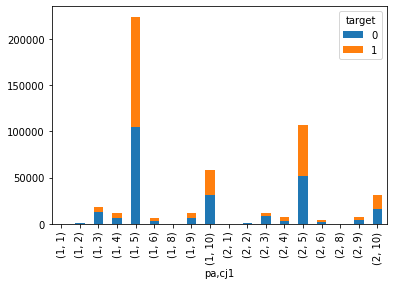

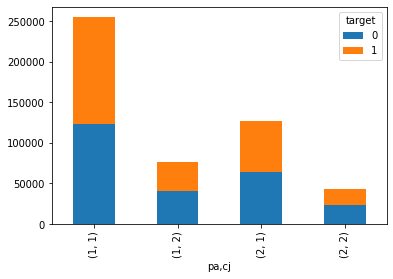

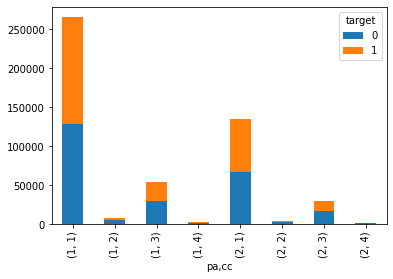

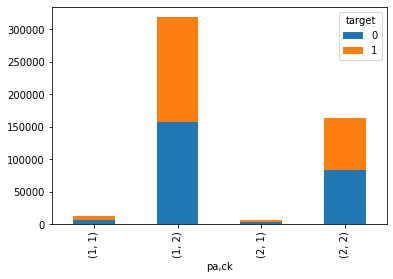

In [ ]:
cols = ['cj1', 'cj', 'cc', 'ck']
for col in cols:
  tra_g = tra.groupby(['pa', col, 'target']).count()['id']
  tra_g.unstack().plot(kind='bar', stacked=True)

## 어떤 사람이 많이 사용할까

In [ ]:
person_cols

['pa',
 'pa1',
 'pb',
 'pc',
 'pd1l',
 'pd1m',
 'pd1n',
 'pd1o',
 'pd2l',
 'pd2m',
 'pd2n',
 'pd2o',
 'pd3l',
 'pd3m',
 'pd3n',
 'pd3o',
 'pe',
 'pf',
 'pg',
 'ph1l',
 'ph1m',
 'ph2l',
 'ph2m',
 'ph3l',
 'ph3m']

In [ ]:
tra.groupby([col, 'target']).count().iloc[:, 0]

pa  target
1   0         163899
    1         167361
2   0          87207
    1          83484
Name: pa1, dtype: int64

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


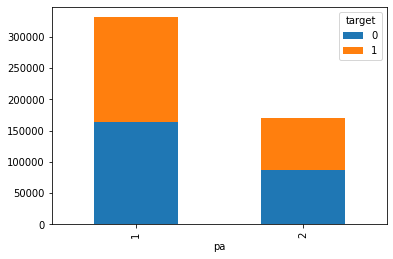

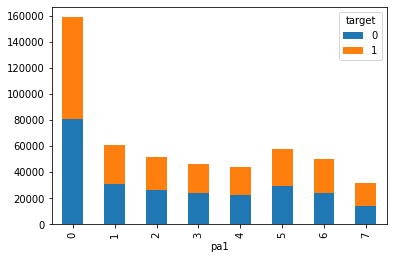

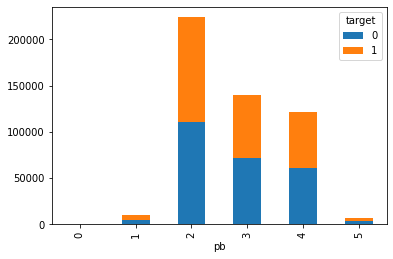

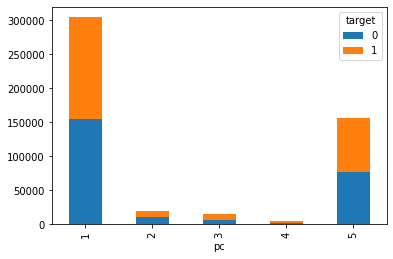

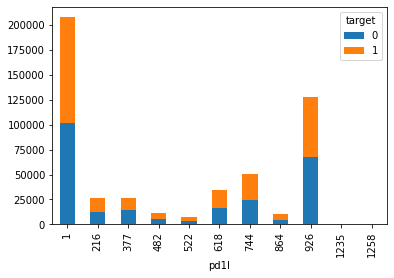

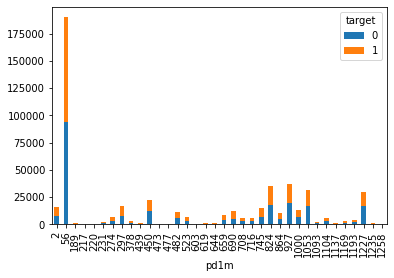

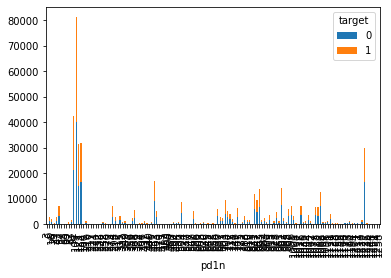

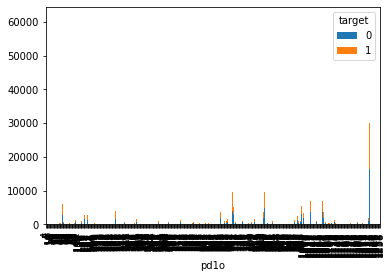

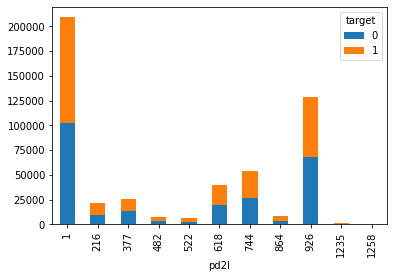

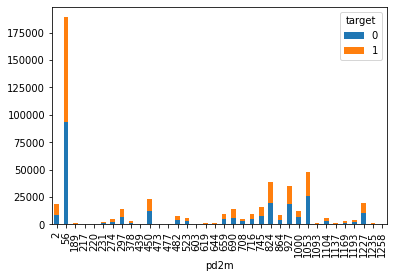

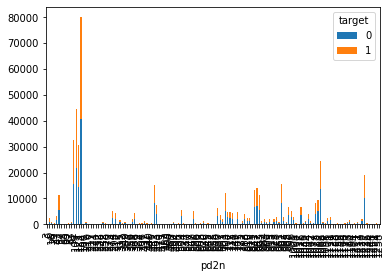

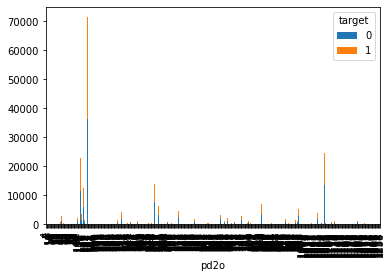

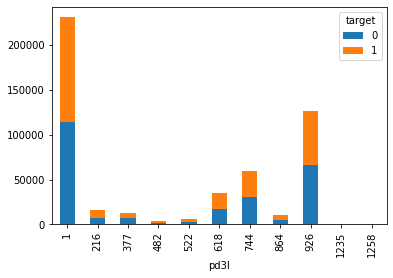

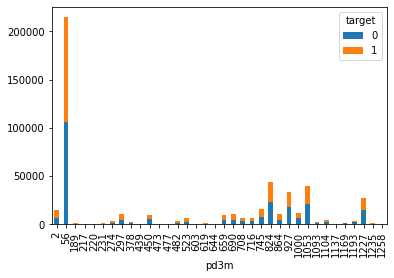

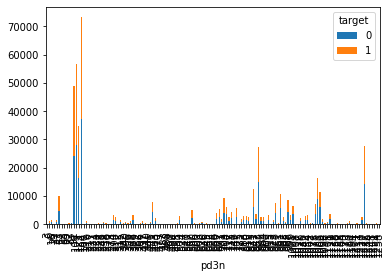

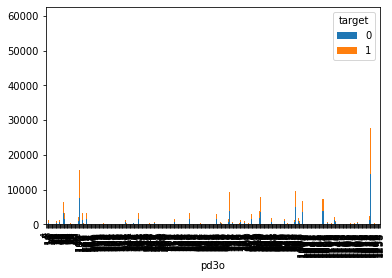

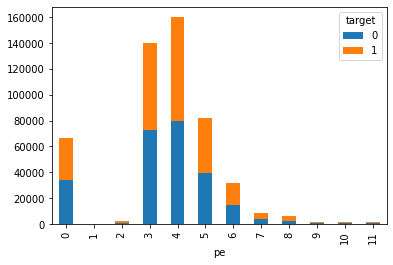

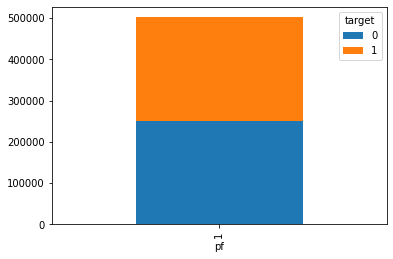

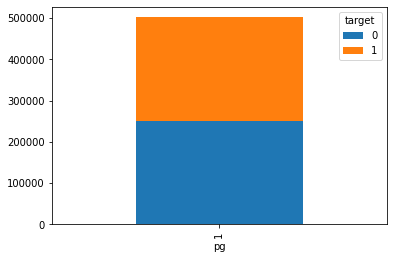

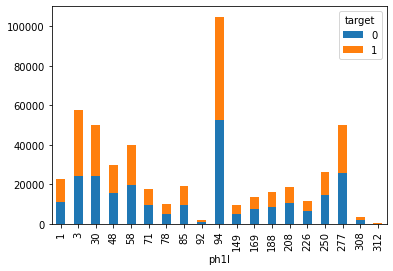

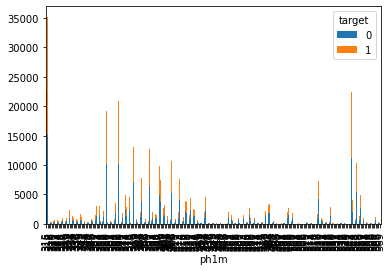

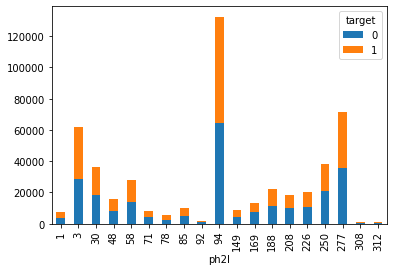

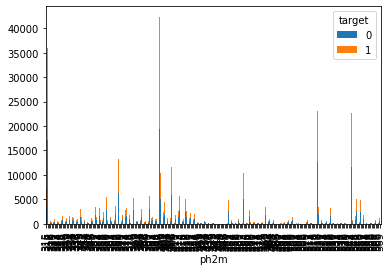

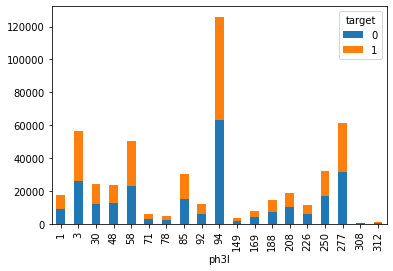

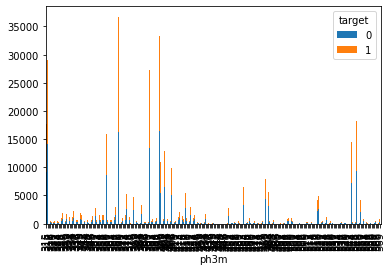

In [ ]:
for col in person_cols:
  tra_g = tra.groupby([col, 'target']).count().iloc[:, 0]
  tra_g.unstack().plot(kind='bar', stacked=True)

## 칼럼의 타입 보기

In [ ]:
tra.columns

Index(['pa', 'pa1', 'pb', 'pc', 'pd1', 'pd2', 'pd3', 'pe', 'pf', 'pg', 'ph1',
       'ph2', 'ph3', 'ci', 'ca', 'cj1', 'cj', 'cc', 'ck', 'cl', 'cd', 'cm',
       'ce', 'ch', 'person_rn', 'contents_rn', 'contents_open_dt', 'target',
       'pd1l', 'pd1m', 'pd1n', 'pd1o', 'pd2l', 'pd2m', 'pd2n', 'pd2o', 'pd3l',
       'pd3m', 'pd3n', 'pd3o', 'ph1l', 'ph1m', 'ph2l', 'ph2m', 'ph3l', 'ph3m',
       'cdl', 'cdm', 'cdn', 'cdo', 'chl', 'chm', 'cll', 'clm', 'cln', 'clo',
       'a_match', 'c_match', 'd1_match', 'd1l_match', 'd1m_match', 'd1n_match',
       'd1o_match', 'd2_match', 'd2l_match', 'd2m_match', 'd2n_match',
       'd2o_match', 'd3_match', 'd3l_match', 'd3m_match', 'd3n_match',
       'd3o_match', 'e_match', 'h1_match', 'h1l_match', 'h1m_match',
       'h2_match', 'h2l_match', 'h2m_match', 'h3_match', 'h3l_match',
       'h3m_match', 'nof_match'],
      dtype='object')

In [ ]:
tra['pa'].dtype

dtype('int64')

In [ ]:
for col in tra.columns:
  col_type = tra[col].dtype
  nof_uni = len(tra[col].unique())
  print(f'col : {col:>10}, dtype : {col_type}, unique : {nof_uni}')

col :         pa, dtype : category, unique : 2
col :        pa1, dtype : int64, unique : 8
col :         pb, dtype : int64, unique : 6
col :         pc, dtype : category, unique : 5
col :        pd1, dtype : category, unique : 1093
col :        pd2, dtype : category, unique : 1081
col :        pd3, dtype : category, unique : 1043
col :         pe, dtype : int64, unique : 12
col :         pf, dtype : category, unique : 1
col :         pg, dtype : category, unique : 1
col :        ph1, dtype : category, unique : 279
col :        ph2, dtype : category, unique : 279
col :        ph3, dtype : category, unique : 279
col :         ci, dtype : category, unique : 3
col :         ca, dtype : category, unique : 3
col :        cj1, dtype : category, unique : 9
col :         cj, dtype : category, unique : 2
col :         cc, dtype : category, unique : 4
col :         ck, dtype : category, unique : 2
col :         cl, dtype : int64, unique : 1752
col :         cd, dtype : category, unique : 1065
col

## 어떤 컨텐츠가 인기가 많을까

In [ ]:
cols = ['ca', 'cc', 'cd', 'cdl', 'cdm', 'cdn', 'cdo', 'ce', 'ch', 'chl', 'chm', 'ci', 'cj', 'cj1', 'ck', 'cl', 'cll', 'clm', 'cln', 'clo', 'cm']

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


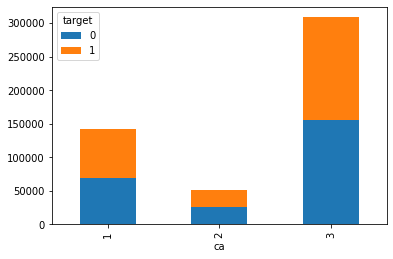

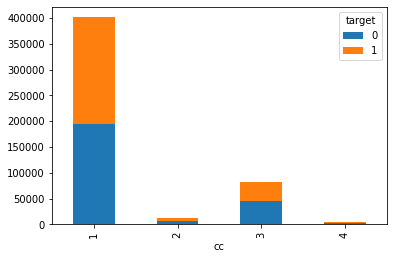

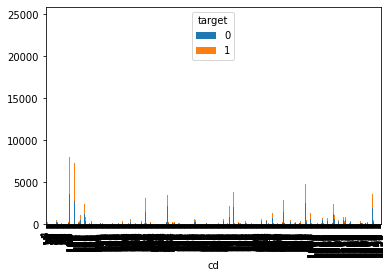

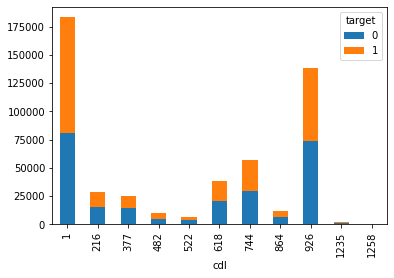

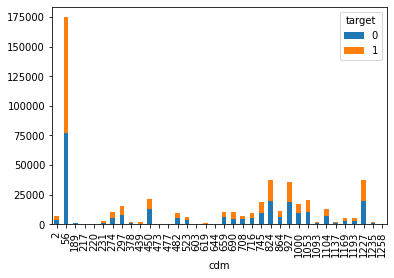

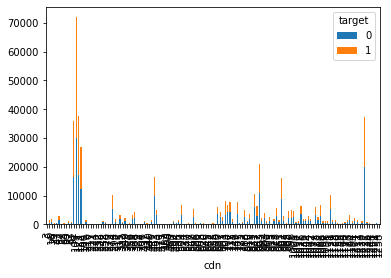

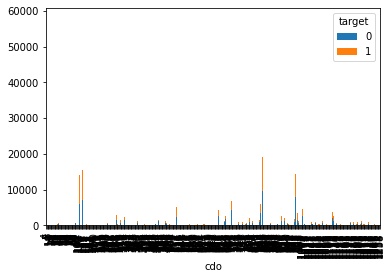

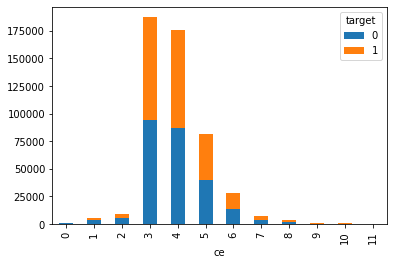

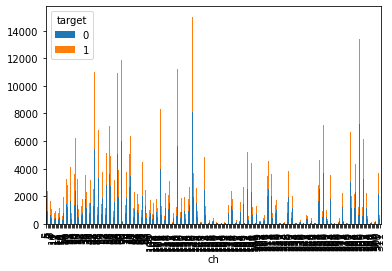

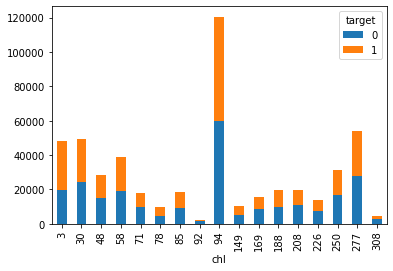

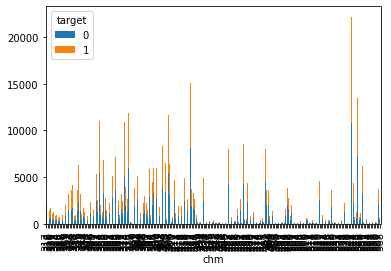

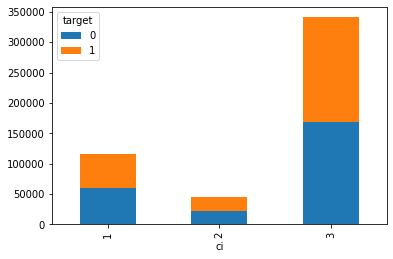

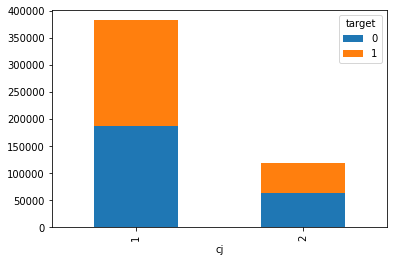

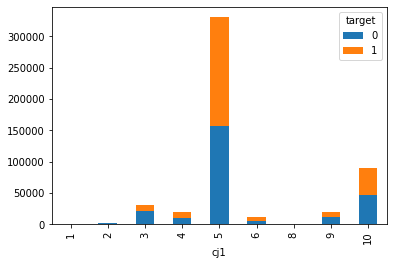

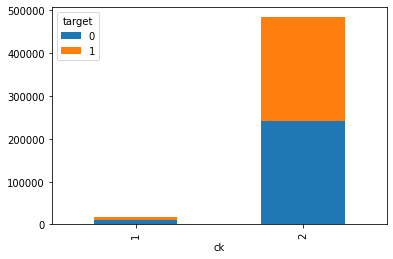

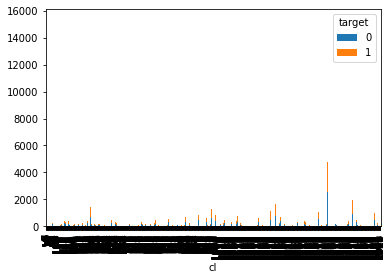

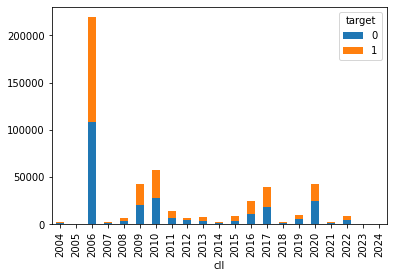

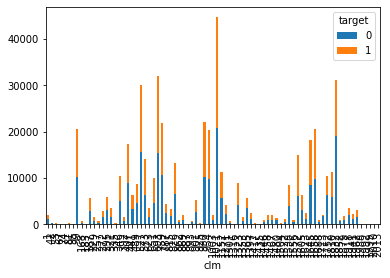

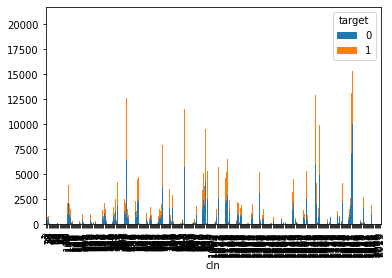

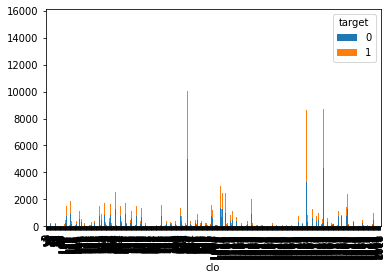

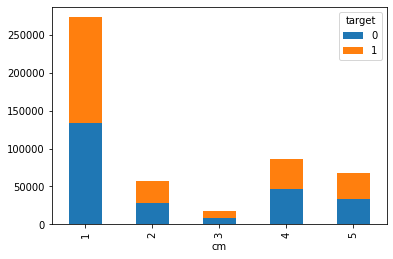

In [ ]:
for col in cols:
  tra_g = tra.groupby([col, 'target']).count()['id']
  tra_g.unstack().plot(kind='bar', stacked=True)

어떤게 매치가 잘될수록 1이 높을까

In [ ]:
cols = [
        'a_match',	'c_match',
        'd1_match',	'd1l_match',	'd1m_match',	'd1n_match', 'd1o_match',
        'd2_match',	'd2l_match',	'd2m_match',	'd2n_match',	'd2o_match',
        'd3_match',	'd3l_match',	'd3m_match',	'd3n_match',	'd3o_match',
        'e_match',
        'h1_match',	'h1l_match',	'h1m_match',
        'h2_match',	'h2l_match',	'h2m_match',
        'h3_match',	'h3l_match',	'h3m_match'
        ]

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


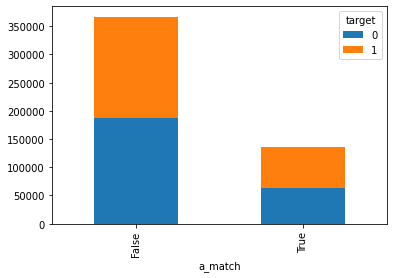

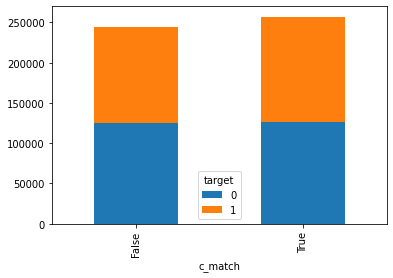

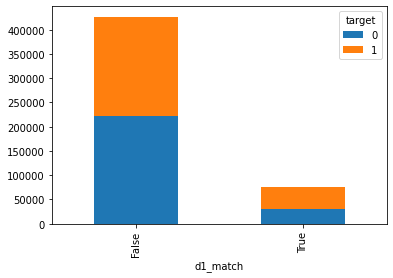

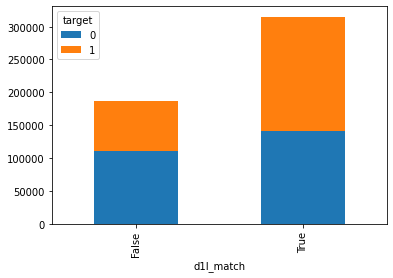

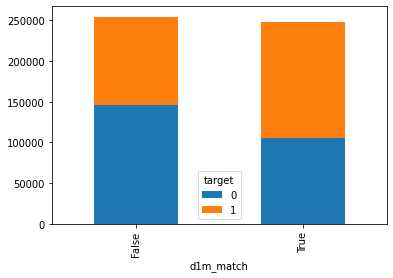

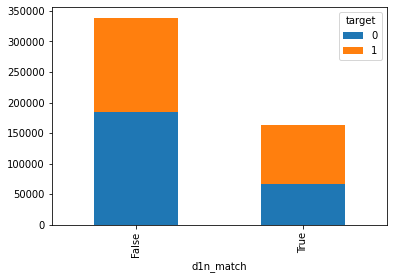

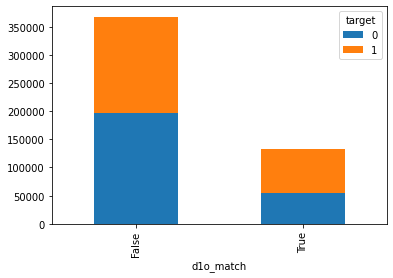

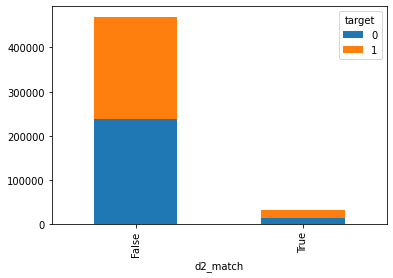

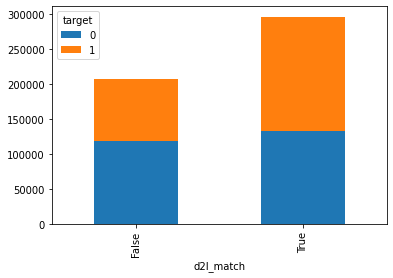

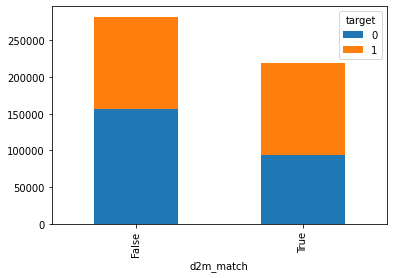

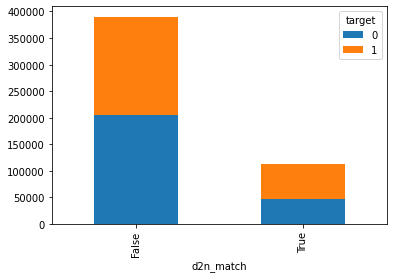

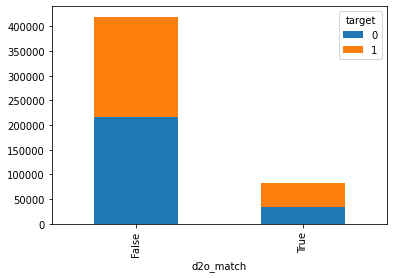

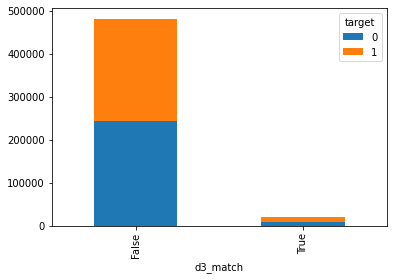

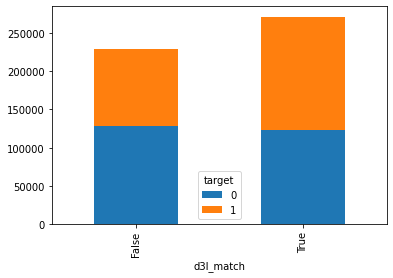

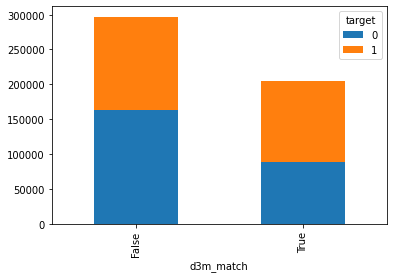

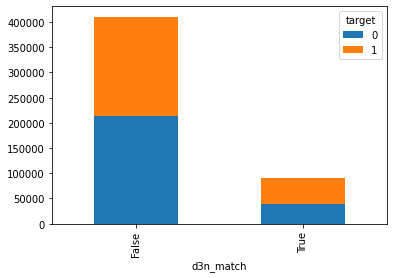

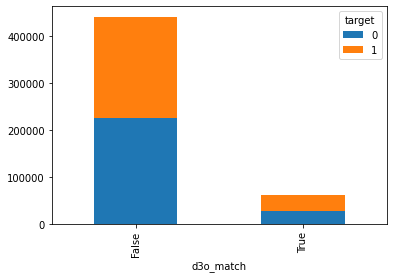

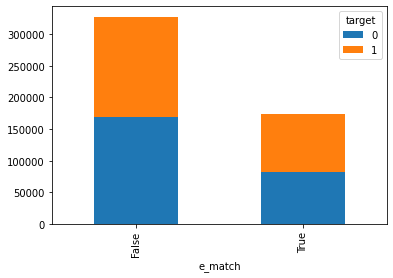

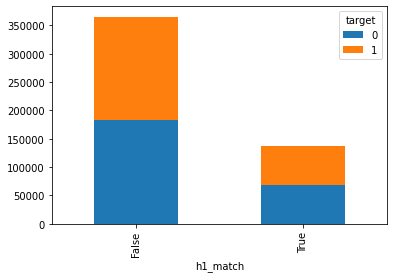

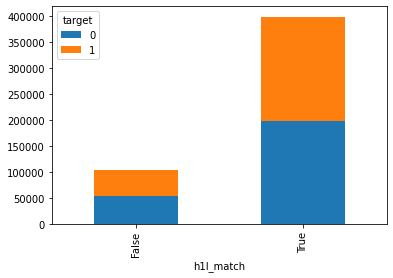

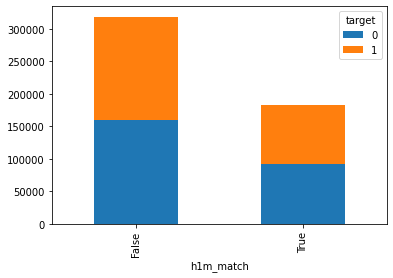

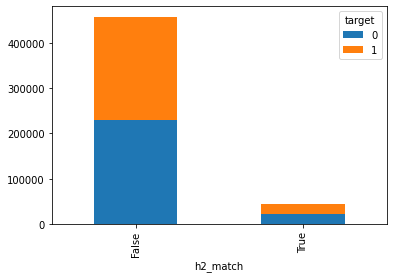

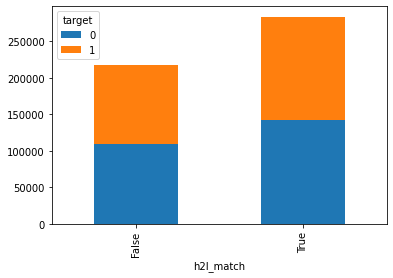

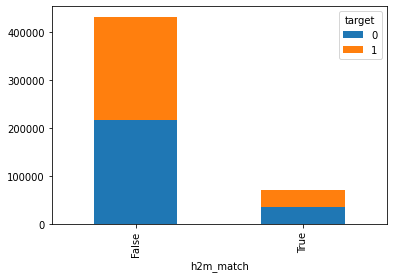

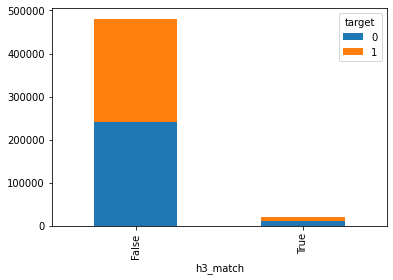

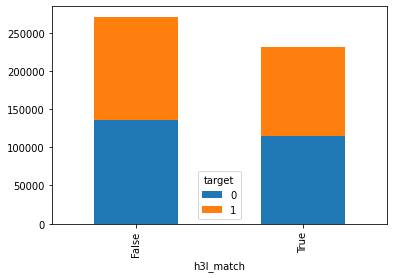

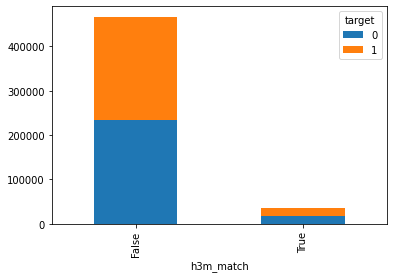

In [ ]:
for col in cols:
  tra_g = tra.groupby([col, 'target']).count()['id']
  tra_g.unstack().plot(kind='bar', stacked=True)

그룹바이해보자

In [ ]:
tra.groupby(['d1_match', 'd2_match', 'target']).count()

id  dlmatch  ...  h3l_match  h3m_match
d1_match d2_match target                   ...                      
False    False    0       208272   208272  ...     208272     208272
                  1       186623   186623  ...     186623     186623
         True     0        13034    13034  ...      13034      13034
                  1        18765    18765  ...      18765      18765
True     False    0        29800    29800  ...      29800      29800
                  1        45457    45457  ...      45457      45457

[6 rows x 87 columns]

a, c, d1, d2, d3, e, h1, h2, h3 중에서 많이 매치돼야 사용할거아닌가?

그럼 몇개가 맞는지를 만들어보자

# 모델돌리기

In [3]:
tra

,pa,pa1,pb,pc,pd1,pd2,pd3,pe,pf,pg,ph1,ph2,ph3,ci,ca,cj1,cj,cc,ck,cl,cd,cm,ce,ch,person_rn,contents_rn,contents_open_dt,target,pd1l,pd1m,pd1n,pd1o,pd2l,pd2m,pd2n,pd2o,pd3l,pd3m,pd3n,pd3o,...,ph3l,ph3m,cdl,cdm,cdn,cdo,chl,chm,cll,clm,cln,clo,a_match,c_match,d1_match,d1l_match,d1m_match,d1n_match,d1o_match,d2_match,d2l_match,d2m_match,d2n_match,d2o_match,d3_match,d3l_match,d3m_match,d3n_match,d3o_match,e_match,h1_match,h1l_match,h1m_match,h2_match,h2l_match,h2m_match,h3_match,h3l_match,h3m_match,nof_match
0,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1,216,274,274,275,216,297,368,369,216,297,368,369,...,58,368,216,274,274,275,94,422,2016,1605,1606,1607,False,False,True,True,True,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,8
1,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0,1,56,109,114,1,56,152,175,1,56,152,175,...,94,399,216,274,274,275,94,417,2016,1605,1606,1607,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,True,False,False,True,False,6
2,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0,377,450,463,464,1,56,152,175,377,450,451,452,...,48,366,1,56,91,92,48,363,2016,1572,1595,1599,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,4
3,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0,618,690,703,703,618,690,703,703,618,690,703,703,...,1,315,216,274,274,275,71,381,2016,1605,1606,1607,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,2
4,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0,216,274,274,275,216,297,368,369,216,297,368,369,...,208,480,216,274,274,275,71,381,2016,1605,1606,1607,True,False,True,True,True,True,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,1,1,2,2,1192,935,1228,3,1,1,59,4,95,3,3,5,1,1,2,354,147,1,5,65,503156,285850,2020-03-13 12:55:52,1,926,1169,1180,1192,926,927,928,929,926,1227,1227,1227,...,94,398,1,56,123,145,58,373,2006,346,347,352,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,1
501947,1,6,2,1,118,113,110,4,1,1,105,142,95,3,3,10,2,1,2,163,120,1,4,142,676255,456996,2020-01-20 11:51:51,1,1,56,109,114,1,56,109,110,1,56,109,110,...,94,398,1,56,109,114,94,425,2006,99,138,155,False,True,False,True,True,True,True,False,True,True,True,False,False,True,True,True,False,True,False,True,False,True,True,True,False,True,False,17
501948,1,7,4,1,147,46,145,4,1,1,59,127,139,3,1,5,1,1,2,438,147,2,7,65,484528,293258,2020-08-05 17:27:24,1,1,56,123,145,1,2,43,46,1,56,123,145,...,94,422,1,56,123,145,58,373,2006,407,417,437,True,True,True,True,True,True,True,False,True,False,False,False,False,True,True,True,True,False,False,True,False,False,False,False,False,False,False,13
501949,1,1,2,1,46,147,145,4,1,1,251,49,258,3,2,5,1,1,2,660,147,3,4,259,456330,273797,2020-06-15 09:23:21,1,1,2,43,46,1,56,123,145,1,56,123,145,...,250,523,1,56,123,145,250,524,2006,651,652,659,False,True,False,True,False,False,False,True,True,True,True,True,False,True,True,True,True,True,False,True,False,Fal

In [4]:
# 학습 칼럼 뽑기

# def select(tra):

#   # tra_x = tra[[
#   #              'a_match',	'c_match',
#   #              'd1_match',	'd1l_match',	'd1m_match',	'd1n_match', 'd1o_match',
#   #              'd2_match',	'd2l_match',	'd2m_match',	'd2n_match',	'd2o_match',
#   #              'd3_match',	'd3l_match',	'd3m_match',	'd3n_match',	'd3o_match',
#   #              'e_match',
#   #              'h1_match',	'h1l_match',	'h1m_match',
#   #              'h2_match',	'h2l_match',	'h2m_match',
#   #              'h3_match',	'h3l_match',	'h3m_match',  'nof_match'
#   #               ]]

#   # tra_x = tra[[
#   #             'd1_match', 'd1o_match', 'd1_match', 'nof_match'
#   #               ]]

#   tra_x = tra.drop(['person_rn', 'contents_rn', 'contents_open_dt', 'target'], axis=1)
#   return tra_x

# tra_x = select(tra)
# tes_x = select(tes)

drop_cols = [
                  'person_rn', 'contents_rn', 'contents_open_dt', 'pf', 'pg',
                  'target'
                  ]

tra_x = tra.drop(drop_cols, axis=1)

tes_x = tes.drop(drop_cols[:-1], axis=1)

print(tra_x.dtypes)

tra_y = tra['target']

tra_x

pa           category
pa1             int64
pb              int64
pc           category
pd1          category
               ...   
h2m_match        bool
h3_match         bool
h3l_match        bool
h3m_match        bool
nof_match       int64
Length: 78, dtype: object


,pa,pa1,pb,pc,pd1,pd2,pd3,pe,ph1,ph2,ph3,ci,ca,cj1,cj,cc,ck,cl,cd,cm,ce,ch,pd1l,pd1m,pd1n,pd1o,pd2l,pd2m,pd2n,pd2o,pd3l,pd3m,pd3n,pd3o,ph1l,ph1m,ph2l,ph2m,ph3l,ph3m,cdl,cdm,cdn,cdo,chl,chm,cll,clm,cln,clo,a_match,c_match,d1_match,d1l_match,d1m_match,d1n_match,d1o_match,d2_match,d2l_match,d2m_match,d2n_match,d2o_match,d3_match,d3l_match,d3m_match,d3n_match,d3o_match,e_match,h1_match,h1l_match,h1m_match,h2_match,h2l_match,h2m_match,h3_match,h3l_match,h3m_match,nof_match
0,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,216,274,274,275,216,297,368,369,216,297,368,369,3,316,94,398,58,368,216,274,274,275,94,422,2016,1605,1606,1607,False,False,True,True,True,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,8
1,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,1,56,109,114,1,56,152,175,1,56,152,175,94,417,94,400,94,399,216,274,274,275,94,417,2016,1605,1606,1607,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,True,False,False,True,False,6
2,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,377,450,463,464,1,56,152,175,377,450,451,452,48,364,250,528,48,366,1,56,91,92,48,363,2016,1572,1595,1599,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,4
3,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,618,690,703,703,618,690,703,703,618,690,703,703,71,379,226,495,1,315,216,274,274,275,71,381,2016,1605,1606,1607,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,2
4,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,216,274,274,275,216,297,368,369,216,297,368,369,208,483,208,481,208,480,216,274,274,275,71,381,2016,1605,1606,1607,True,False,True,True,True,True,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,1,1,2,2,1192,935,1228,3,59,4,95,3,3,5,1,1,2,354,147,1,5,65,926,1169,1180,1192,926,927,928,929,926,1227,1227,1227,58,368,3,316,94,398,1,56,123,145,58,373,2006,346,347,352,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,1
501947,1,6,2,1,118,113,110,4,105,142,95,3,3,10,2,1,2,163,120,1,4,142,1,56,109,114,1,56,109,110,1,56,109,110,94,401,94,425,94,398,1,56,109,114,94,425,2006,99,138,155,False,True,False,True,True,True,True,False,True,True,True,False,False,True,True,True,False,True,False,True,False,True,True,True,False,True,False,17
501948,1,7,4,1,147,46,145,4,59,127,139,3,1,5,1,1,2,438,147,2,7,65,1,56,123,145,1,2,43,46,1,56,123,145,58,368,94,413,94,422,1,56,123,145,58,373,2006,407,417,437,True,True,True,True,True,True,True,False,True,False,False,False,False,True,True,True,True,False,False,True,False,False,False,False,False,False,False,13
501949,1,1,2,1,46,147,145,4,251,49,258,3,2,5,1,1,2,660,147,3,4,259,1,2,43,46,1,56,123,145,1,56,123,145,250,518,48,359,250,523,1,56,123,145,250,524,2006,651,652,659,False,True,False,True,False,False,False,True,True,True,True,True,False,True,True,True,True,True,False,True,False,False,False,False,False,True,False,14


## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

X_train, X_val, y_train, y_val = train_test_split(tra_x, tra_y, test_size=0.1, random_state=42)

rfc = RandomForestClassifier(n_estimators=50, oob_score=True, criterion='gini', max_depth=8, random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_val)
f1_score(y_val, y_pred, average='macro')

KeyboardInterrupt: ignored

## LGBM

In [ ]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(learning_rate=0.03, n_estimators=10, max_depth=5)
lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_val)
f1_score(y_val, y_pred, average='macro')

0.5964602201399096

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train, y_train)

y_pred = ada.predict(X_val)
f1_score(y_val, y_pred, average='macro')

0.5999301662423371

## XGBoost

In [ ]:
import xgboost as xgb
xgboost=xgb.XGBClassifier(max_dept=10)
xgboost.fit(X_train, y_train)

y_pred = xgboost.predict(X_val)
f1_score(y_val, y_pred, average='macro')

ValueError: ignored

## Catboost

In [6]:
pip install catboost

     |████████████████████████████████| 76.1 MB 1.1 MB/s 


In [5]:
from catboost import Pool,CatBoostClassifier
from sklearn.model_selection import StratifiedKFold , KFold

SEED = 42
is_holdout = False
n_splits = 5
iterations = 3000
patience = 50

cv = KFold(n_splits=n_splits, shuffle=True, random_state=SEED)

cat_features = tra_x.columns[tra_x.nunique() > 2].tolist()

cat_cols = []
for col in tra_x.columns:
  if str(tra[col].dtype )== 'category' or tra[col].dtype == bool:
    cat_cols.append(col)

ModuleNotFoundError: ignored

In [ ]:
scores = []
models = []

for tri, vai in cv.split(tra_x):
    print("="*50)
    preds = []

    model = CatBoostClassifier(
                              iterations=iterations,
                               random_state=SEED,
                               task_type="GPU",
                               eval_metric="F1",
                               cat_features=cat_cols,
                               one_hot_max_size=4
                               )
    model.fit(tra_x.iloc[tri], tra_y[tri], 
            eval_set=[(tra_x.iloc[vai], tra_y[vai])], 
            early_stopping_rounds=patience ,
            verbose = 100
        )
    
    models.append(model)
    scores.append(model.get_best_score()["validation"]["F1"])
    if is_holdout:
        break    

Learning rate set to 0.027144
0:	learn: 0.6164713	test: 0.6203285	best: 0.6203285 (0)	total: 135ms	remaining: 6m 44s
100:	learn: 0.6329626	test: 0.6388785	best: 0.6388785 (100)	total: 11.6s	remaining: 5m 33s
200:	learn: 0.6467071	test: 0.6608611	best: 0.6608611 (200)	total: 23s	remaining: 5m 20s
300:	learn: 0.6522391	test: 0.6674485	best: 0.6675715 (299)	total: 34.4s	remaining: 5m 8s
400:	learn: 0.6567921	test: 0.6714862	best: 0.6715289 (398)	total: 45.2s	remaining: 4m 53s
500:	learn: 0.6599258	test: 0.6742200	best: 0.6744087 (497)	total: 56.3s	remaining: 4m 40s
600:	learn: 0.6623374	test: 0.6757914	best: 0.6760250 (593)	total: 1m 6s	remaining: 4m 27s
700:	learn: 0.6639467	test: 0.6766556	best: 0.6769041 (685)	total: 1m 17s	remaining: 4m 14s
800:	learn: 0.6656191	test: 0.6769841	best: 0.6772824 (769)	total: 1m 28s	remaining: 4m 2s
900:	learn: 0.6668725	test: 0.6781291	best: 0.6781291 (900)	total: 1m 38s	remaining: 3m 49s
bestTest = 0.6781291173
bestIteration = 900
Shrink model to first

In [ ]:
print(scores)
print(np.mean(scores))

[0.678129117259552, 0.6749216213450429, 0.6764116601292435, 0.6732087696828147, 0.6730800155131152]
0.6751502367859537


In [ ]:
threshold = np.arange(0.3, 0.51, 0.01)
threshold

array([0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ,
       0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 ])

In [ ]:
for th in threshold:
  pred_list = []
  scores = []
  for i,(tri, vai) in enumerate( cv.split(tra_x) ):
      pred = models[i].predict_proba(tra_x.iloc[vai])[:, 1]
      pred = np.where(pred >= th , 1, 0)
      score = f1_score(tra_y[vai],pred)
      scores.append(score)
      pred = models[i].predict_proba(tes_x)[:, 1]
      pred_list.append(pred)
  print(f'threshold : {th}')
  print(scores)
  print(f'{np.mean(scores):.4f}')
  print(f'')

threshold : 0.3
[0.7005918019097412, 0.6957700806382185, 0.6993585402969207, 0.6987561000333059, 0.6982237298026771]
0.6985400505361727
threshold : 0.31
[0.7021497513892951, 0.6968487167454788, 0.7006923460556811, 0.6999110047707279, 0.6993956039920981]
0.6997994845906562
threshold : 0.32
[0.7034455317142182, 0.6978897862163713, 0.7015952062537405, 0.7013972085228984, 0.7005247459533871]
0.7009704957321231
threshold : 0.33
[0.7047106965414294, 0.699206279471634, 0.7024465834252168, 0.7023551113843965, 0.7021013043608035]
0.702163995036696
threshold : 0.34
[0.7056171022374029, 0.7002045654277043, 0.7034655770704081, 0.7030063953140876, 0.7026990400903445]
0.7029985360279895
threshold : 0.35000000000000003
[0.7067321496033244, 0.7008991425740657, 0.704706176619951, 0.7033396155295892, 0.7035559910967282]
0.7038466150847317
threshold : 0.36000000000000004
[0.7077493533940138, 0.7019282089832738, 0.7053829562663484, 0.7039337474120083, 0.7040699681614178]
0.7046128468434125
threshold : 0.3

In [ ]:
pred = np.mean( pred_list , axis = 0 )
pred = np.where(pred >= threshold , 1, 0)

In [ ]:
sample_submission = pd.read_csv('Jobcare_data/sample_submission.csv')
sample_submission['target'] = pred
sample_submission

,id,target
0,0,1
1,1,0
2,2,1
3,3,1
4,4,1
...,...,...
46399,46399,1
46400,46400,1
46401,46401,1
46402,46402,1


In [ ]:
sample_submission.to_csv('catboost2.csv', index=False)

## Feature Importance

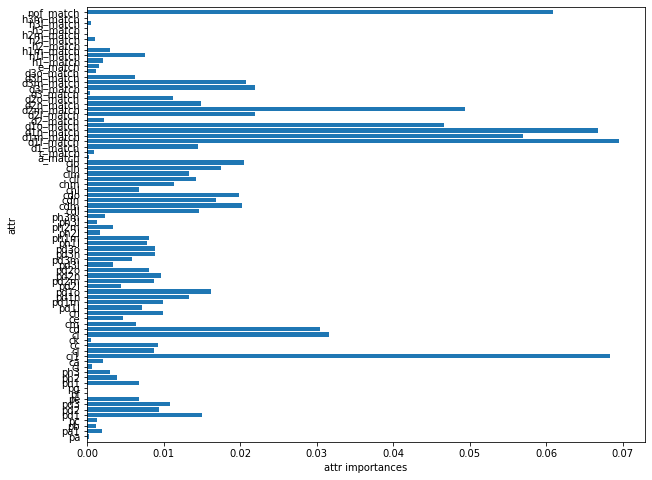

In [ ]:
#2. feature_importances_: feature별 중요도를 수치로 표현 (총합:1)
## 결정에 각 특성이 얼마나 중요한지 평가하는 것

def plot_feature_importances(model):

    n_features = X_train.shape[1]
    plt.figure(figsize=(10, 8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)

plot_feature_importances(rfc)
plt.show()

#제출파일생성

In [ ]:
submission = pd.read_csv('Jobcare_data/sample_submission.csv')
submission['target'] = lgbm.predict(tes_x)
submission

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
46399,46399,1
46400,46400,0
46401,46401,1
46402,46402,1


In [ ]:
submission.to_csv('lgbm.csv', index=False)

# catboost 공유된 코드

In [ ]:
DATA_PATH = "/content/drive/MyDrive/015GithubRepos/Dacon_jobcare_recommendation/Jobcare_data/"
SUBMIT_PATH = "/content/drive/MyDrive/015GithubRepos/Dacon_jobcare_recommendation/"

SEED = 42

import os
import sys
import platform
import random
import math
from typing import List ,Dict, Tuple

import pandas as pd
import numpy as np
 
import sklearn 
from sklearn.model_selection import StratifiedKFold , KFold
from sklearn.metrics import f1_score 

from catboost import Pool,CatBoostClassifier

print(f"- os: {platform.platform()}")
print(f"- python: {sys.version}")
print(f"- pandas: {pd.__version__}")
print(f"- numpy: {np.__version__}")
print(f"- sklearn: {sklearn.__version__}")



train_data = pd.read_csv(f'{DATA_PATH}train.csv')
test_data = pd.read_csv(f'{DATA_PATH}test.csv')

code_d = pd.read_csv(f'{DATA_PATH}속성_D_코드.csv')
code_h = pd.read_csv(f'{DATA_PATH}속성_H_코드.csv')
code_l = pd.read_csv(f'{DATA_PATH}속성_L_코드.csv')

print(train_data.shape , test_data.shape)

code_d.columns= ["attribute_d","attribute_d_d","attribute_d_s","attribute_d_m","attribute_d_l"]
code_h.columns= ["attribute_h","attribute_h_p", "attribute_h_l"]
code_l.columns= ["attribute_l","attribute_l_d","attribute_l_s","attribute_l_m","attribute_l_l"]



def merge_codes(df:pd.DataFrame,df_code:pd.DataFrame,col:str)->pd.DataFrame:
    df = df.copy()
    df_code = df_code.copy()
    df_code = df_code.add_prefix(f"{col}_")
    df_code.columns.values[0] = col
    return pd.merge(df,df_code,how="left",on=col)

def preprocess_data(
                    df:pd.DataFrame,is_train:bool = True,
                    cols_merge:List[Tuple[str,pd.DataFrame]] = [],
                    cols_equi:List[Tuple[str,str]]= [],
                    cols_drop:List[str] = ["id","person_prefer_f","person_prefer_g" ,"contents_open_dt"]
                    )->Tuple[pd.DataFrame,np.ndarray]:
    df = df.copy()

    y_data = None
    if is_train:
        y_data = df["target"].to_numpy()
        df = df.drop(columns="target")

    for col, df_code in cols_merge:
        df = merge_codes(df,df_code,col)

    cols = df.select_dtypes(bool).columns.tolist()
    df[cols] = df[cols].astype(int)

    for col1, col2 in cols_equi:
        df[f"{col1}_{col2}"] = (df[col1] == df[col2] ).astype(int)

    df = df.drop(columns=cols_drop)
    return (df , y_data)


# 소분류 중분류 대분류 속성코드 merge 컬럼명 및 데이터 프레임 리스트
cols_merge = [
              ("person_prefer_d_1" , code_d),
              ("person_prefer_d_2" , code_d),
              ("person_prefer_d_3" , code_d),
              ("contents_attribute_d" , code_d),
              ("person_prefer_h_1" , code_h),
              ("person_prefer_h_2" , code_h),
              ("person_prefer_h_3" , code_h),
              ("contents_attribute_h" , code_h),
              ("contents_attribute_l" , code_l),
]

# 회원 속성과 콘텐츠 속성의 동일한 코드 여부에 대한 컬럼명 리스트
cols_equi = [

    ("contents_attribute_c","person_prefer_c"),
    ("contents_attribute_e","person_prefer_e"),

    ("person_prefer_d_2_attribute_d_s" , "contents_attribute_d_attribute_d_s"),
    ("person_prefer_d_2_attribute_d_m" , "contents_attribute_d_attribute_d_m"),
    ("person_prefer_d_2_attribute_d_l" , "contents_attribute_d_attribute_d_l"),
    ("person_prefer_d_3_attribute_d_s" , "contents_attribute_d_attribute_d_s"),
    ("person_prefer_d_3_attribute_d_m" , "contents_attribute_d_attribute_d_m"),
    ("person_prefer_d_3_attribute_d_l" , "contents_attribute_d_attribute_d_l"),

    ("person_prefer_h_1_attribute_h_p" , "contents_attribute_h_attribute_h_p"),
    ("person_prefer_h_2_attribute_h_p" , "contents_attribute_h_attribute_h_p"),
    ("person_prefer_h_3_attribute_h_p" , "contents_attribute_h_attribute_h_p"),

]

# 학습에 필요없는 컬럼 리스트
cols_drop = ["id","person_prefer_f","person_prefer_g" ,"contents_open_dt", "contents_rn" ]


x_train, y_train = preprocess_data(train_data, cols_merge = cols_merge , cols_equi= cols_equi , cols_drop = cols_drop)
x_test, _ = preprocess_data(test_data,is_train = False, cols_merge = cols_merge , cols_equi= cols_equi  , cols_drop = cols_drop)
print(x_train.shape , y_train.shape , x_test.shape)


cat_features = x_train.columns[x_train.nunique() > 2].tolist()

is_holdout = False
n_splits = 5
iterations = 3000
patience = 50

cv = KFold(n_splits=n_splits, shuffle=True, random_state=SEED)


scores = []
models = []


models = []
for tri, vai in cv.split(x_train):
    print("="*50)
    preds = []

    model = CatBoostClassifier(iterations=iterations,random_state=SEED,task_type="GPU",eval_metric="F1",cat_features=cat_features,one_hot_max_size=4)
    model.fit(x_train.iloc[tri], y_train[tri], 
            eval_set=[(x_train.iloc[vai], y_train[vai])], 
            early_stopping_rounds=patience ,
            verbose = 100
        )
    
    models.append(model)
    scores.append(model.get_best_score()["validation"]["F1"])
    if is_holdout:
        break    

- os: Linux-5.4.144+-x86_64-with-Ubuntu-18.04-bionic
- python: 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
- pandas: 1.1.5
- numpy: 1.19.5
- sklearn: 1.0.2
(501951, 35) (46404, 34)
(501951, 68) (501951,) (46404, 68)


KeyboardInterrupt: ignored

In [ ]:
print(scores)
print(np.mean(scores))

[0.6861142862540976, 0.6849371872319974, 0.6839513597834872, 0.6791294326576108, 0.6794904725210955]
0.6827245476896577


In [ ]:
threshold = 0.4

In [ ]:
pred_list = []
scores = []
for i,(tri, vai) in enumerate( cv.split(x_train) ):
    pred = models[i].predict_proba(x_train.iloc[vai])[:, 1]
    pred = np.where(pred >= threshold , 1, 0)
    score = f1_score(y_train[vai],pred)
    scores.append(score)
    pred = models[i].predict_proba(x_test)[:, 1]
    pred_list.append(pred)
print(scores)
print(np.mean(scores))

[0.7133118573473903, 0.7122647232490233, 0.7099635519143309, 0.7088621940163191, 0.7089549802487676]
0.7106714613551663


In [ ]:
x_train

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,person_prefer_d_1_attribute_d_d,person_prefer_d_1_attribute_d_s,person_prefer_d_1_attribute_d_m,person_prefer_d_1_attribute_d_l,person_prefer_d_2_attribute_d_d,person_prefer_d_2_attribute_d_s,person_prefer_d_2_attribute_d_m,person_prefer_d_2_attribute_d_l,person_prefer_d_3_attribute_d_d,person_prefer_d_3_attribute_d_s,person_prefer_d_3_attribute_d_m,person_prefer_d_3_attribute_d_l,contents_attribute_d_attribute_d_d,contents_attribute_d_attribute_d_s,contents_attribute_d_attribute_d_m,contents_attribute_d_attribute_d_l,person_prefer_h_1_attribute_h_p,person_prefer_h_1_attribute_h_l,person_prefer_h_2_attribute_h_p,person_prefer_h_2_attribute_h_l,person_prefer_h_3_attribute_h_p,person_prefer_h_3_attribute_h_l,contents_attribute_h_attribute_h_p,contents_attribute_h_attribute_h_l,contents_attribute_l_attribute_l_d,contents_attribute_l_attribute_l_s,contents_attribute_l_attribute_l_m,contents_attribute_l_attribute_l_l,contents_attribute_c_person_prefer_c,contents_attribute_e_person_prefer_e,person_prefer_d_2_attribute_d_s_contents_attribute_d_attribute_d_s,person_prefer_d_2_attribute_d_m_contents_attribute_d_attribute_d_m,person_prefer_d_2_attribute_d_l_contents_attribute_d_attribute_d_l,person_prefer_d_3_attribute_d_s_contents_attribute_d_attribute_d_s,person_prefer_d_3_attribute_d_m_contents_attribute_d_attribute_d_m,person_prefer_d_3_attribute_d_l_contents_attribute_d_attribute_d_l,person_prefer_h_1_attribute_h_p_contents_attribute_h_attribute_h_p,person_prefer_h_2_attribute_h_p_contents_attribute_h_attribute_h_p,person_prefer_h_3_attribute_h_p_contents_attribute_h_attribute_h_p
0,1,1,1,0,0,0,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,316,3,398,94,368,58,422,94,1607,1606,1605,2016,0,0,0,0,1,0,0,1,0,0,0
1,0,0,0,1,1,0,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,417,94,400,94,399,94,417,94,1607,1606,1605,2016,1,1,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,364,48,528,250,366,48,363,48,1599,1595,1572,2016,0,0,0,1,1,0,0,0,0,0,0
3,0,0,0,1,0,0,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,379,71,495,226,315,1,381,71,1607,1606,1605,2016,0,1,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,483,208,481,208,480,208,381,71,1607,1606,1605,2016,0,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,0,0,0,1,0,0,1,1,2,2,1192,935,1228,3,59,4,95,3,3,5,1,1,2,354,147,1,5,65,503156,1192,1180,1169,926,929,928,927,926,1227,1227,1227,926,145,123,56,1,368,58,316,3,398,94,373,58,352,347,346,2006,0,0,0,0,0,0,0,0,0,0,0
501947,1,1,0,1,0,0,1,6,2,1,118,113,110,4,105,142,95,3,3,10,2,1,2,163,120,1,4,142,676255,114,109,56,1,110,109,56,1,110,109,56,1,114,109,56,1,401,94,425,94,398,94,425,94,155,138,99,2006,1,1,1,1,1,1,1,1,0,1,0
501948,1,1,1,1,0,0,1,7,4,1,147,46,145,4,59,127,139,3,1,5,1,1,2,438,147,2,7,65,484528,145,123,56,1,46,43,2,1,145